<h1 align="center">
<img src="https://drive.google.com/uc?export=view&id=1_ZkE3dnYg9KykzdZE6lIK2s_q_nbiKk_" width="160" height="160">
</h1>
<h5 align="center">Sharif University of Technology<br/>Electrical Engineering Department<br/>Fall 2023</h5>

---


# **HW5 - SVM Notebook - Statistical Learning**

**Mohammad Ali Etemadi Naeen**

**402200348**



# SVM

In this exercise, we see Support Vector Machine (SVM) with various kernel functions.  

We use Scikit-learn, a Python package of machine learning methods. We are using a toy binary classification example to understand Linear SVM, and then see feature expansion and kernel functions to extend it to non-linearly separable data.

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from plots import plot, plot_expand, plot_simple_data
from helpers import get_circle_dataset, get_simple_dataset
%load_ext autoreload
%autoreload 2

# 1 Scikit-Learn

Training an SVM classifer is not a easy task, so in this session, we are going to use Scikit-Learn, which is a machine learning library for Python. Most of the machine learning algorithms and tools are already implemented. In this exercise, we'll use this package to train and understand SVM. If you are interested in how to optimize a SVM, you can refer to [this](https://xavierbourretsicotte.github.io/SVM_implementation.html).

This package `sklearn` should already be implemented in your conda enviornment. If it's not the case, type the following command in your terminal:
```
conda install -y -c conda-forge sklearn
```

Scikit-Learn has modules implemented broadly for 
- Data Transformations: https://scikit-learn.org/stable/data_transforms.html
- Model Selection and Training: https://scikit-learn.org/stable/model_selection.html
- Supervised Techniques: https://scikit-learn.org/stable/supervised_learning.html
- Unsupervised Techniques: https://scikit-learn.org/stable/unsupervised_learning.html

All the magic happens under the hood, but gives you freedom to try out more complicated stuff.  
Different methods to be noted here are
- `fit`: Train a model with the data
- `predict`: Use the model to predict on test data
- `score`: Return mean accuracy on the given test data

Have a look at [this](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting) for a simple example.

We will explore SVM for classification in this session: [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC). We will start here with the linear kernel.

In [4]:
# We import the SVM classifier class from scikit-learn.
from sklearn.svm import SVC

# 2 Linear SVM

SVM tries to solve linear classification problem of this form:

$$
\begin{align}
    \mathbf{w}^* = \underset{\mathbf{w},\{\xi_n\}}{\operatorname{argmin}}  \ \ & \frac{1}{2}\|\mathbf{w}\|^2 + C \sum^N_{n=1}\xi_n \\
    \operatorname{subject \  to} \ \ &  t_n\cdot(\tilde{\mathbf{w}}\cdot\mathbf{x_n}) \geq 1-\xi_n , \forall n \\
                        &\text{and  }\  \xi_n \geq 0 , \forall n
\end{align}
$$
where, $\tilde{\mathbf{w}}$ are the weights with bias term, $x_n$ is a data sample and $t_n$ is a label.

**Q.** Why do we minimize $\|\mathbf{w}\|$ ? 

**A.** We know that marigin is equal to $\mathbf{1}/\|\mathbf{w}\|$, So because we want to maximize the margin, we should minimize the $\|\mathbf{w}\|$. So minimizing it encourages finding a decision boundary with a large margin, promoting a more robust and generalized model.

**Q.** What is C? How should we choose the best value for C?

**A.** It is the regularization parameter that controls the data crossing from the gap boundary, in fact, value C allows us to have some misclassification points to avoid overfitting. higher C causes hard_margin SVM and lower C causes soft_margin SVM. with cross-validation methods we should select the best C for our problem because the best value for C depends on the specific dataset and the desired balance between accuracy and model simplicity.
    
**Q.** What does it mean when $\xi_i \gt 0$ ?

**A.** $\xi_i \gt 0$ shows that point i crosses the gap boundary and either be placed in the gap region or the region of the opposite class


## 2.1 Binary Classification

Let's begin with a simple **binary** classification using Linear SVM.
The data is simply **linearly** separable.

We visualize here the optimal maximum-margin solution without misclassifications.

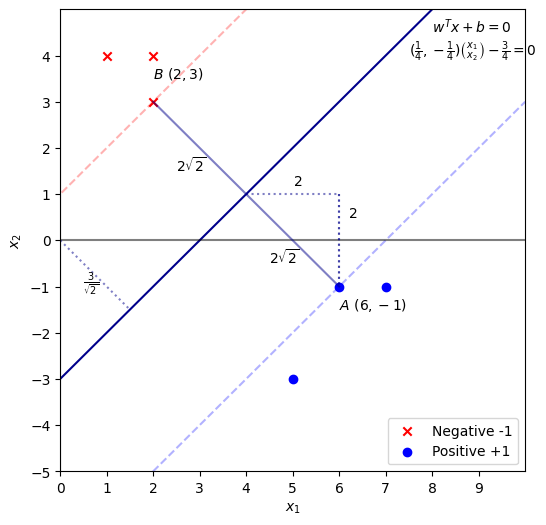

In [5]:
# Simple data with 3 points per class
X = np.array([[2,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )
Y = np.array([-1, -1, -1, 1, 1, 1])
plot_simple_data()

In this part, you are asked to build a SVM classifier using SVC and to understand the outputs from the fitted model.

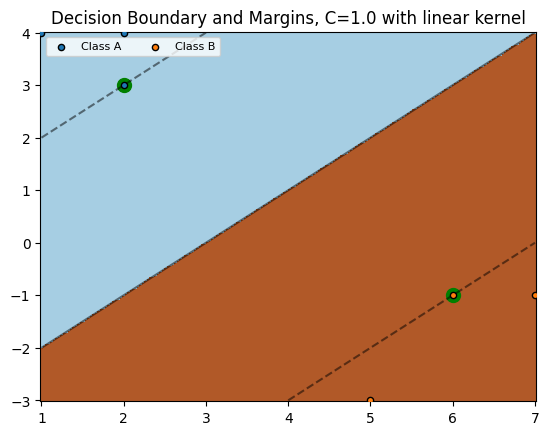

w =  [[ 0.25 -0.25]]
w0 =  [-0.75]
Number of support vectors for each class =  [1 1]
Support vectors =  [[ 2.  3.]
 [ 6. -1.]]
Indices of support vectors =  [2 3]


In [6]:
### WRITE YOUR CODE HERE
# 1. Declare a SVC with C=1.0 and kernel='linear'
clf = SVC(C=1.0, kernel='linear')

# 2. use X and Y to fit the model
clf.fit(X, Y)

# 3. We show the fitted model
plot(X, Y, clf)

# Some information we can extract from the model
# Take note of them as you might need them in the future!
print('w = ', clf.coef_)
print('w0 = ', clf.intercept_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Support vectors = ', clf.support_vectors_)
print('Indices of support vectors = ', clf.support_)

In this case, we found that we have 2 **support vectors**, one in each class. They are shown highlighed in green in the plot. A support vector is a data sample that is either on the margin or within the margin (or misclassified). 

Let's inspect the result of the classification. We do the classification in the following way:

$$ 
y_i = \begin{cases}
-1 & \text{if} \ \mathbf{x}_i^T \mathbf{w} + w_0 < 0\\
1 & \text{otherwise}
\end{cases}
$$

*Note*: when doing this on multiple data points at a time, $X$ is an $N\times D$ matrix.

In [7]:
# Use the weights (w) from the fitted model to predict the labels of input data points
def raw_predict(X, w, w0):
    '''
    Given input data X, SVM weight w and w0, output the prediction result.
    
    Args:
        X: data, array of shape (N, D) where N is the number of datapoints and D is the dimension of features.
        w: weights, array of shape (D,)
        w0: bias, array of shape (1,)
    Returns:
        out: predictions, array of shape (N,)
    '''
    ### WRITE YOUR CODE HERE
    out = np.where(((X @ w[0]) +  w0[0]) < 0, -1, 1)
    return out.astype(int)

x_test = np.array([
    [4, 2],
    [ 6, -3]
])

### WRITE YOUR CODE HERE: Use your implementation to do the prediction on the test data.
raw_pred = raw_predict(x_test, clf.coef_, clf.intercept_)
print("Prediction from your implementation: ", raw_pred)

### WRITE YOUR CODE HERE: Use scikit-learn's predict function to do the prediction on the test data.
model_predict = clf.predict(x_test)

print("Prediction from the model: ", model_predict)

assert np.isclose(raw_pred, model_predict).all(), "Your implementation is not correct."


Prediction from your implementation:  [-1  1]
Prediction from the model:  [-1  1]


Now, let us determine the indices of the support vectors. (Reminder: These are the data samples that fall on the margin or within the margin). 

In [8]:
## We can also calculate the decision function manually.

## Step 1
### WRITE YOUR CODE HERE: Code the decision function: Xw + w_0
decision_function = X @ clf.coef_[0] + clf.intercept_[0] 

## Step 2: We can also retrieve the decision function from the model:
decision_function_from_model = clf.decision_function(X)

assert np.isclose(decision_function, decision_function_from_model).all(), "Your implementation is not correct."

# What condition do the support vectors satisfy? 
"""
It is answered in the below text cell.
"""
# Remember that the support vectors are the points that on to the decision boundary, or within the margin.
### WRITE YOUR CODE HERE, hint: look into np.nonzero
support_vector_indices = np.nonzero(
                         np.where((1-Y * decision_function) < 0, 0, 1))

print('I find the indices of support vectors = ', support_vector_indices)
assert np.isclose(support_vector_indices, clf.support_).all(), "Your implementation is not correct."

I find the indices of support vectors =  (array([2, 3], dtype=int64),)


- What condition do the support vectors satisfy? 

1. $\xi_i = 0$ ==> $1 - t_n\cdot(\tilde{\mathbf{w}}\cdot\mathbf{x_n}) = 0$
2. $\xi_i \gt 0$ ==> $1 - \xi_i - t_n\cdot(\tilde{\mathbf{w}}\cdot\mathbf{x_n}) = 0$


## 2.2 Different C values

Let's explore the effect of $C$ on a different dataset.

**Q.** How do you expect the margin to vary with C? *Hint*: have a look at the optimization formulation above.

**A.**  If we increase the C, in fact, we penalize the $\xi_i$ values, so the margin decreases, but when we decrease the C, $\xi_i$ would increase, so the margin increases. 

In other words, As C increases, the regularization term $\frac{1}{2}|\mathbf{w}|^2$ becomes more dominant in the optimization objective. This leads to a narrower margin, as the model becomes more focused on correctly classifying each training point, potentially resulting in overfitting. Conversely, a smaller C encourages a wider margin, prioritizing a more generalized decision boundary, even if some training points are misclassified.


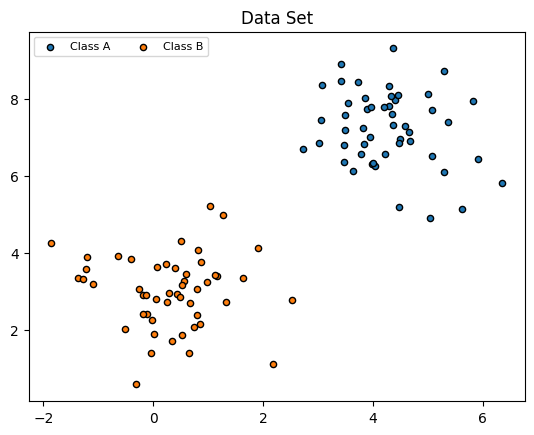

In [9]:
# Get the simple dataset
X, Y = get_simple_dataset()
plot(X, Y, None, dataOnly=True)

In the code below, vary the C value from 0.001 to 10 and pay attention to the changes.

The plot shows the decision boundary and margins of the learnt model. Encircled points are the support vectors.  
WARNING: if the margins go beyond the limits of the axis, they might not be shown.

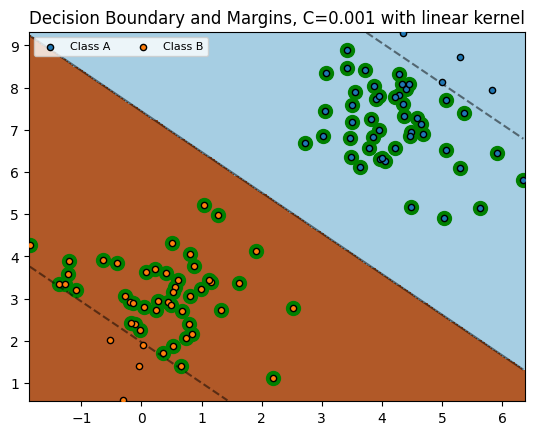

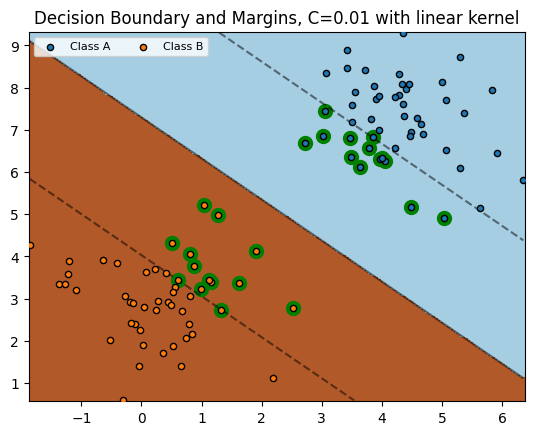

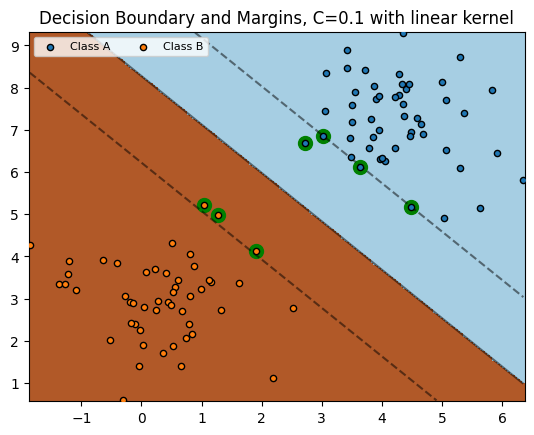

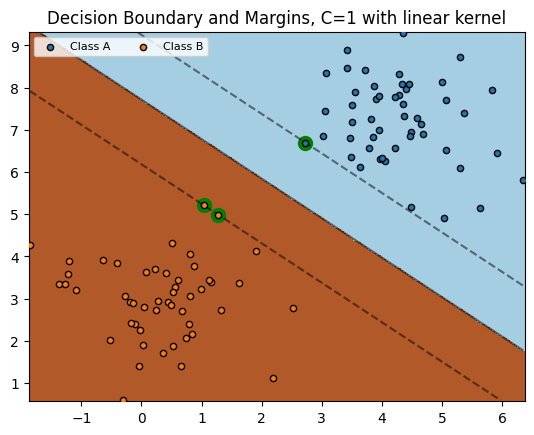

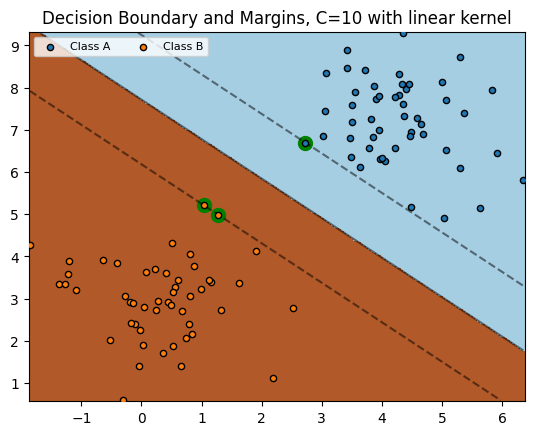

In [10]:
for C_value in [0.001, 0.01, 0.1, 1, 10]:
    # Declare SVM model with linear kernel and varying C
    clf = SVC(C=C_value, kernel='linear')
    
    # Call the fit method
    clf.fit(X, Y)

    # Plot the decision boundary
    plot(X, Y, clf)

### Additional Reading (if interested)
- Multiclass SVM (Bishop- Multiclass SVMs 7.1.3)
- Can we have probabilistic interpretation of SVM? (Bishop- Relevance Support Machine 7.2)

# 3 Kernel SVM

Beyond the linear problem we discussed before, SVM can also solve non-linear classification problem by doing some feature expansion on the input data. 

We replace $\mathbf{x}_i$ with $\phi(\mathbf{x}_i)$, and then $\mathbf{x}_i^\top\mathbf{x}_j$ with $\phi(\mathbf{x}_i)^\top\phi(\mathbf{x}_j)=k(\mathbf{x}_i,\mathbf{x}_j)$. 

$\phi(\cdot)$ is the (possibly unknown) feature expansion function, and $k(\cdot)$ is the kernel function.

The **dual form** of this problem is given by:

$$
\begin{align}
    \underset{\{\lambda_i\}}{\operatorname{max}} \ \ 
    & \sum_{n=1}^N \lambda_i - \frac 1 2 \sum_{i=1}^N\sum_{j=1}^N \lambda_i\lambda_jt_it_jk(\mathbf{x}_i,\mathbf{x}_j)  \\   
    \operatorname{subject \ to} & \ \ \sum_{i=1}^N \lambda_it_i = 0 \\
                 & \ \ 0 \leq \lambda_i \leq C, \forall i \ \ 
\end{align}
$$

**Q.** 
1. How can you write $\mathbf{w}$ using $\lambda_i$ and function $\phi$?
2. How is $y(\mathbf{x})$ represented using $\lambda_i$?
 
**A.**
- 1.  The weight vector $\mathbf{w}$ can be expressed as a linear              combination of the support vectors and their corresponding Lagrange multipliers ($\lambda_i$) and labels ($t_i$) in the feature space:


        w = $\sum_{i=1}^N \lambda_i t_i\phi(\mathbf{x}_i)$

- 2. 
$$ 
y_i = \begin{cases}
-1 & \text{if} (\ \phi(\mathbf{x}_i)^T \mathbf{w} + w_0) < 0\\
1 & \text{otherwise}
\end{cases}
=
\begin{cases}
-1 & \text{if} (\ \sum_{i=1}^N \lambda_iy_ik(\mathbf{x}_i,\mathbf{x}_j) + w_0) < 0\\   
1 & \text{otherwise}
\end{cases}
$$

We continue with the Scikit-Learn implementation of [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). The main parameters you should look for are:
- Kernel Functions: `kernel`. Linear, Polynomial and RBF ($X$ is the data)
    - Linear: `linear`. $\langle X, X' \rangle $.
    - Polynomial: `poly`. $( \gamma \langle X, X' \rangle + r)^d $. $d$ is specified by keyword `degree`, $r$ by `coef0`.
    - RBF: `rbf`. $\exp(-\gamma ||X - X'||^2)$. $\gamma$ is specified by keyword `gamma`, must be greater than 0.
- Penalty term, `C`: for all
- `gamma`: for Polynomial and RBF kernel (mostly RBF)
- `degree`: for Polynomial kernel


## 3.1 Non-linearly separable data

We use a binary dataset that cannot be separated linearly in the original feature space.

Then, we'll try the different kernel and explore how their parameters affect the results.

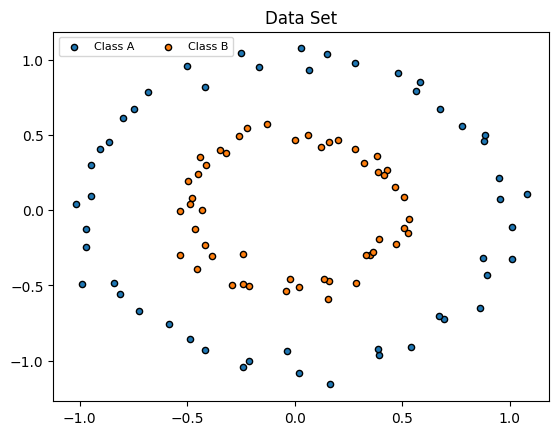

In [11]:
# Load data
X, Y = get_circle_dataset()
plot(X, Y, None, dataOnly=True)

## 3.2 Linear SVM

As you should expect, linear SVM does not perform well in this case.

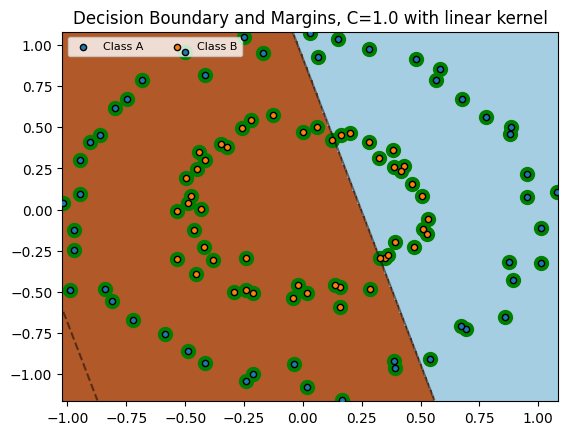

In [12]:
# Use SVM with linear kernel
clf_linear = SVC(kernel='linear', C=1.0)
    
clf_linear.fit(X, Y)
plot(X, Y, clf_linear)

## 3.3 Polynomial SVM

For polynomial SVM, we have two options:
1. We can explicitely write a polynomial feature expansion $\phi_\text{poly}(\cdot)$ to edit the data $X$, then use linear SVM on it.
2. We use the kernel trick to only define a kernel function $k_\text{poly}(\cdot,\cdot)$, which is directly used in SVM.

Let's do both and compare the results!

Fill in the function `expand_X()` that performs polynomial feature expansion. 
You should add a bias term, but **omit the interaction terms**. An example:

For $D=2$ and $\text{degree}=3$, the data
$$
\mathbf{x}_i = \begin{bmatrix}\mathbf{x}_i^{(0)}& \mathbf{x}_i^{(1)}\end{bmatrix},
$$
after the polynomial feature expansion, will become
$$ 
\mathbf{\phi}(\mathbf{x}_i) = \begin{bmatrix}\mathbf{1} & \mathbf{x}_i^{(0)} & \mathbf{x}_i^{(1)} & (\mathbf{x}_i^{(0)})^2 & (\mathbf{x}_i^{(1)})^2 & (\mathbf{x}_i^{(0)})^3 & (\mathbf{x}_i^{(1)})^3 \end{bmatrix}.
$$

In [13]:
# Perform degree-d polynomial feature expansion of input data X
def expand_X(X, degree):
    """
    Polynomial feature expansion with bias but omitting interaction terms
    
    Args:
        X (array): data, shape (N, D).
        degree (int): The degree of the polynomial feature expansion.
    Returns:
        expanded_X (array): Expanded data with shape (N, new_D), 
                               where new_D = D * degree + 1
    """
    ### WRITE YOUR CODE HERE
    expanded_X = np.concatenate(
        ([(X ** i) for i in range(degree+1)]), axis=1)[:,1:]
    
    return expanded_X

--------------------------------------------------------------------------------
The original data has 2 features.
After degree-2 polynomial feature expansion (with bias, without interaction terms) the data has 5 features.


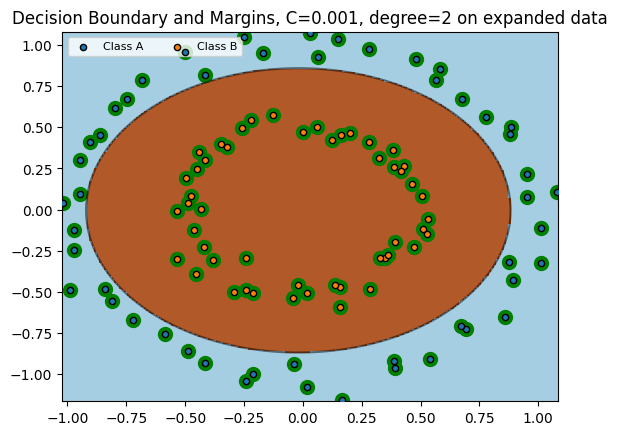

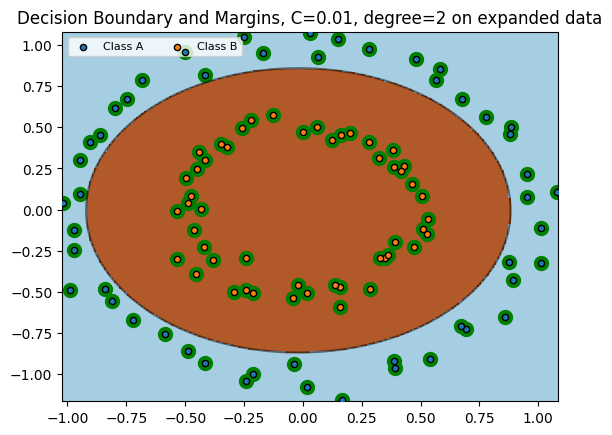

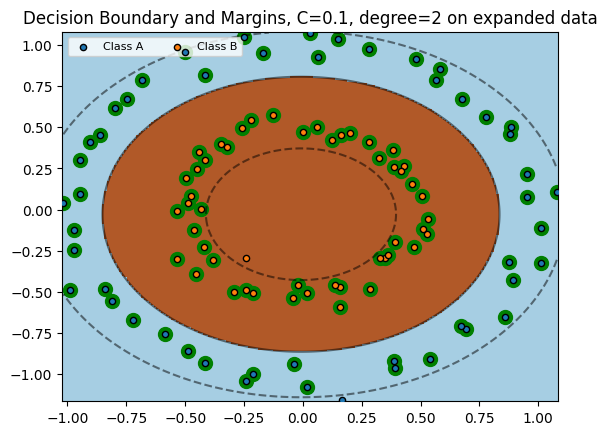

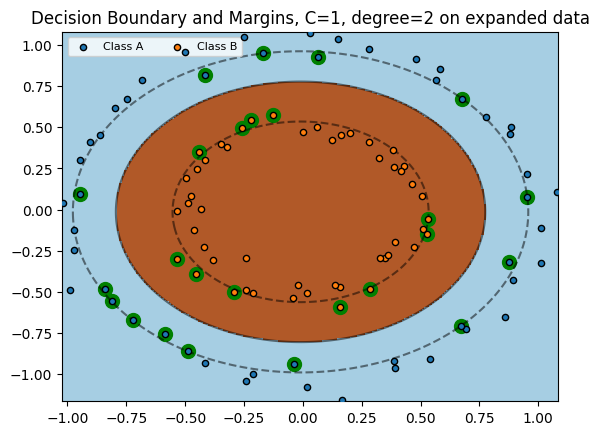

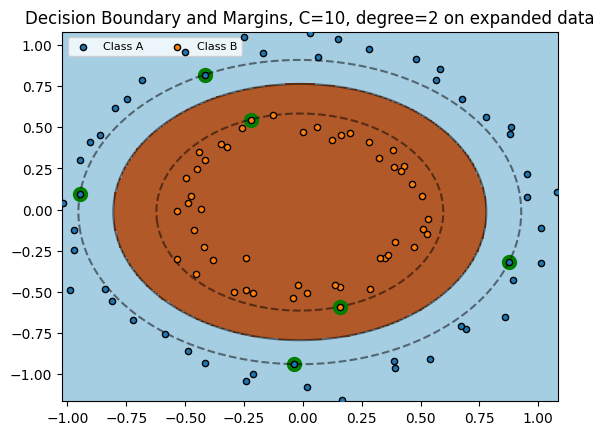

--------------------------------------------------------------------------------
The original data has 2 features.
After degree-5 polynomial feature expansion (with bias, without interaction terms) the data has 11 features.


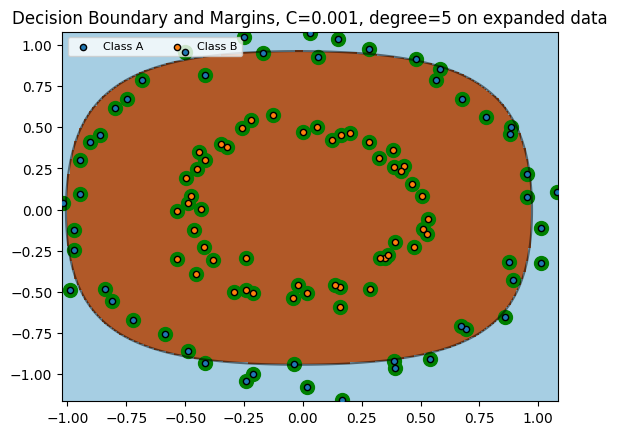

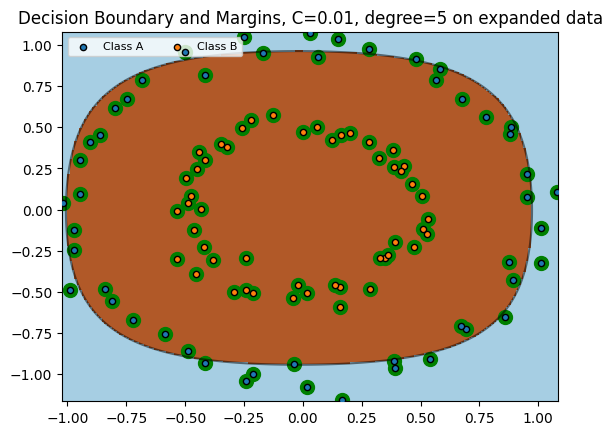

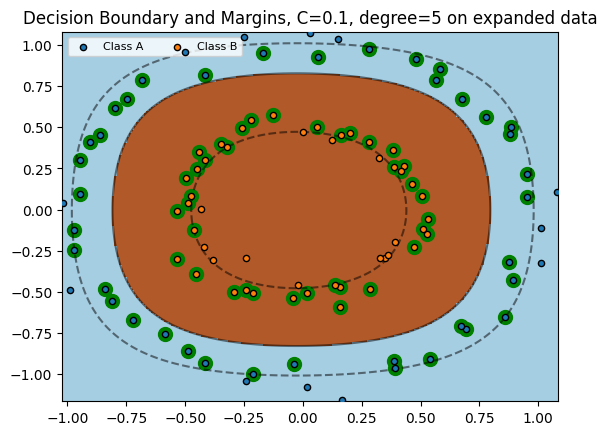

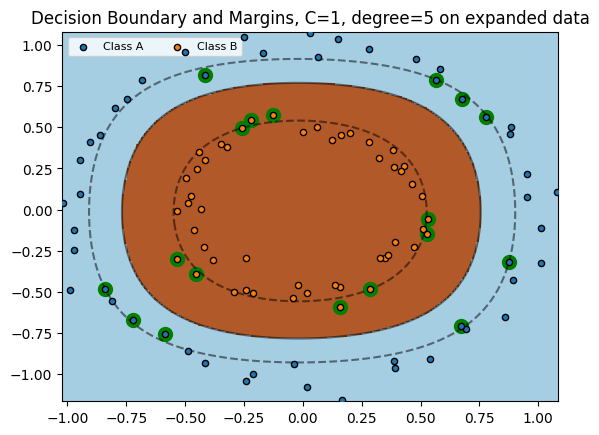

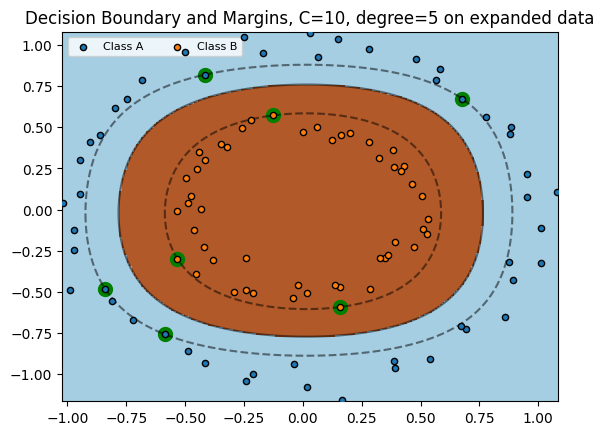

--------------------------------------------------------------------------------
The original data has 2 features.
After degree-10 polynomial feature expansion (with bias, without interaction terms) the data has 21 features.


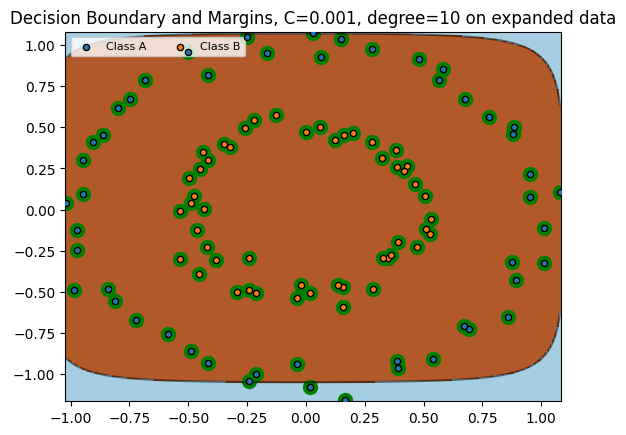

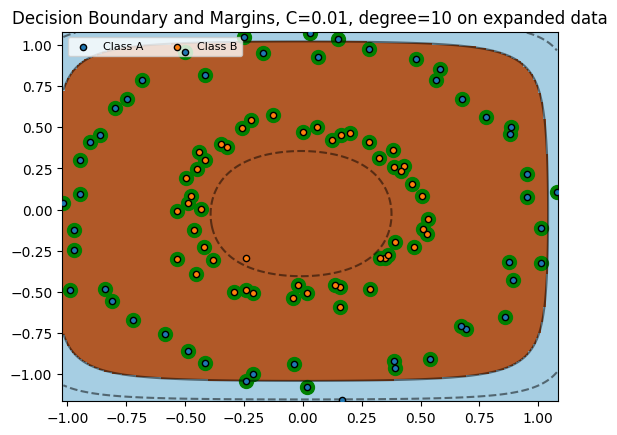

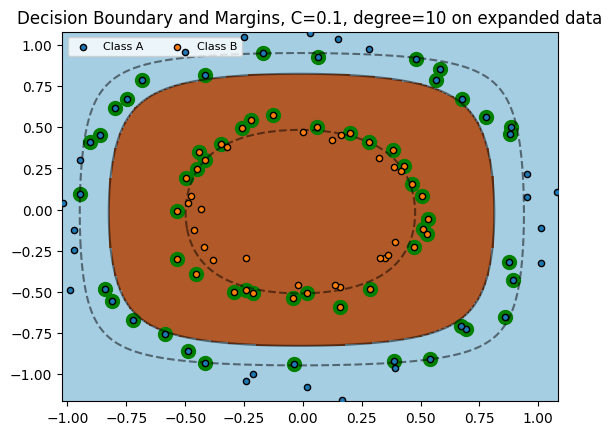

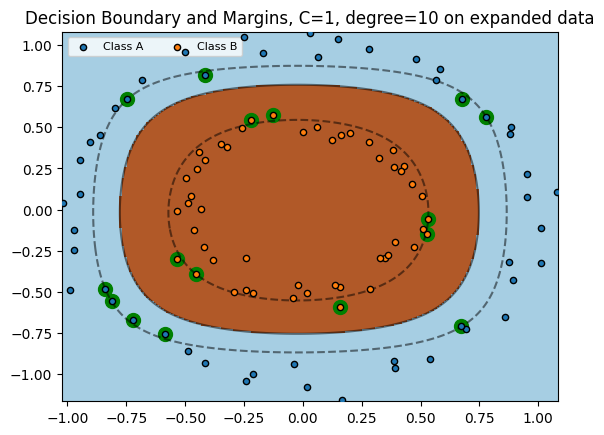

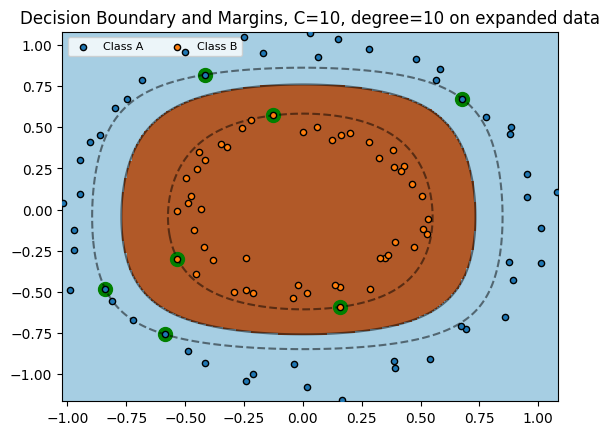

--------------------------------------------------------------------------------
The original data has 2 features.
After degree-20 polynomial feature expansion (with bias, without interaction terms) the data has 41 features.


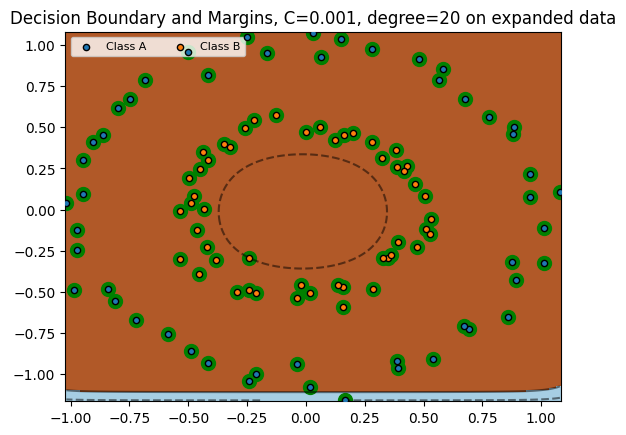

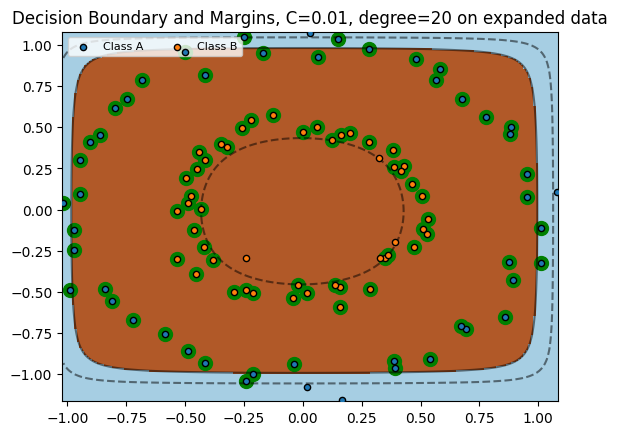

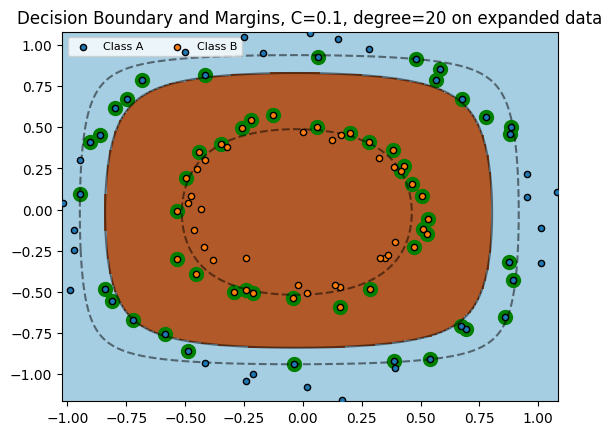

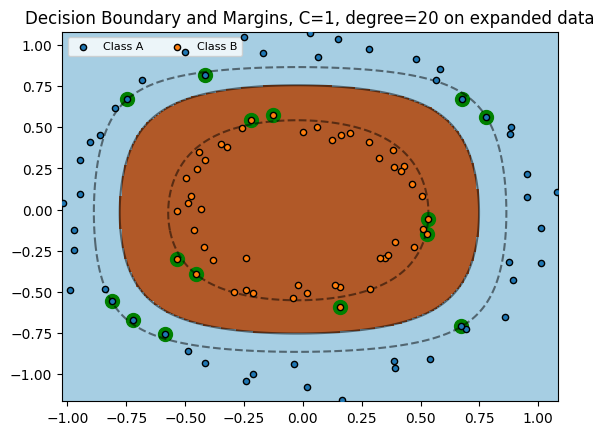

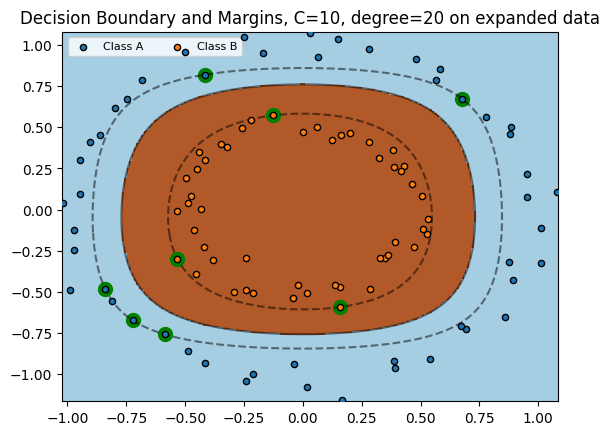

--------------------------------------------------------------------------------
The original data has 2 features.
After degree-50 polynomial feature expansion (with bias, without interaction terms) the data has 101 features.


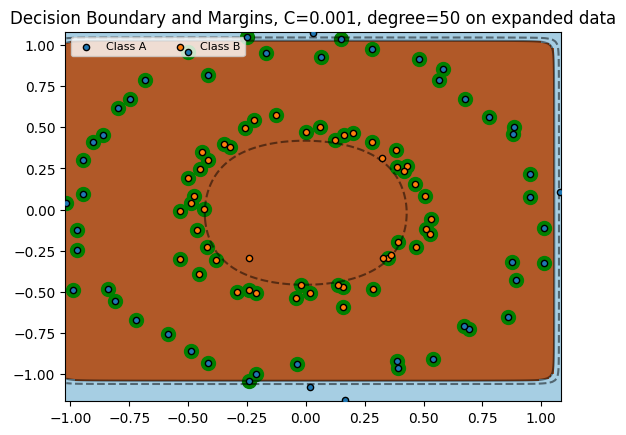

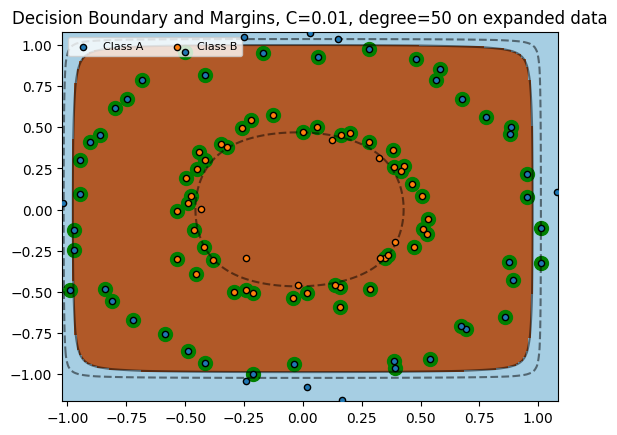

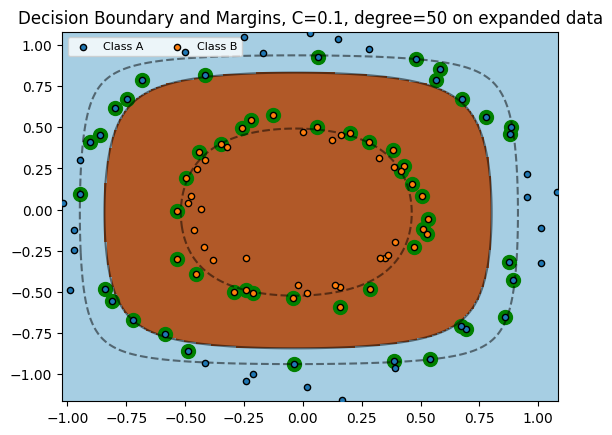

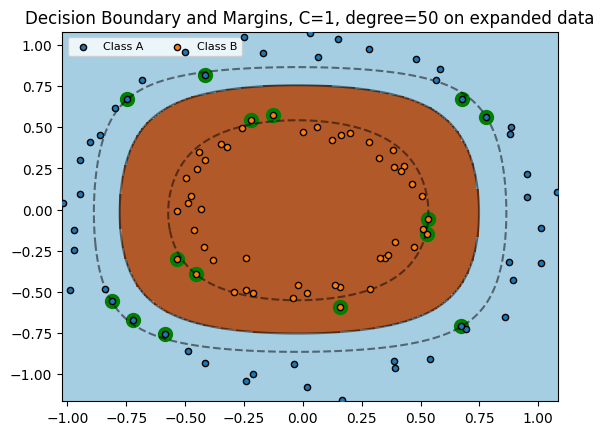

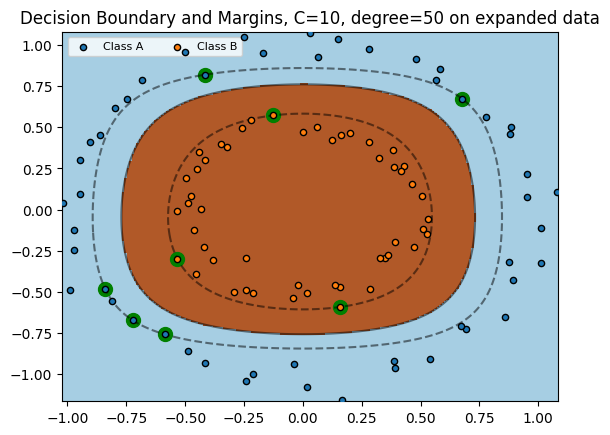

In [20]:
# Polynomial SVM
degree = [2, 5, 10, 20, 50] # you can play with the degree. How does the decision boundary change?
"""
increasing the degree, casues more nonlinearity to model, for our dataset, becuase at most, it is seperable by features with degree = 2, increasing the degree has no comparable changes in decision boundary(from degree = 2 to degree = 10, it converts from elliptic to square, but it's small).
However the number of supports decreases as the degree increases.
"""
## Do polynomial feature expansion
### WRITE YOUR CODE HERE
for degree in degree:
    expanded_X = expand_X(X, degree)

    print("-"*80)
    print("The original data has {} features.".format(X.shape[1]))
    print("After degree-{} polynomial feature expansion (with bias, without interaction terms) the data has {} features.".format(
        degree,expanded_X.shape[1]))

    ## Use SVM with linear kernel on expanded data
    ### WRITE YOUR CODE HERE: you can play with C
    for C_value in [0.001, 0.01, 0.1, 1, 10]:
        expanded_clf = SVC(C=C_value, kernel='linear')
        expanded_clf.fit(expanded_X,Y)

        plot_expand(X, Y, expanded_clf, degree=degree)

The non-linearly separable dataset can now be classified correctly by a linear SVM, thanks to the polynomial feature expansion.

Let's now directly use the polynomial kernel function in SVM.

Given data $\mathbf{X}$ with $N$ samples, its kernel matrix $\mathbf{K}$ is the $N \times N$ symmetric Gram matrix with elelments 

$$ \mathbf{K}_{n,m} = \phi(\mathbf{x}_n)^T\phi(\mathbf{x}_m) = k(\mathbf{x}_n, \mathbf{x}_m) $$

The polynomial kernel is SVM is written as:
- poly: $( \gamma \langle \mathbf{X}, \mathbf{X'} \rangle + r)^d $. $d$ is specified by keyword `degree`, $r$ by `coef0`,
   
where $X$ is the data.

Note that $\phi$ **does not appear explicitly** in the kernel functions!

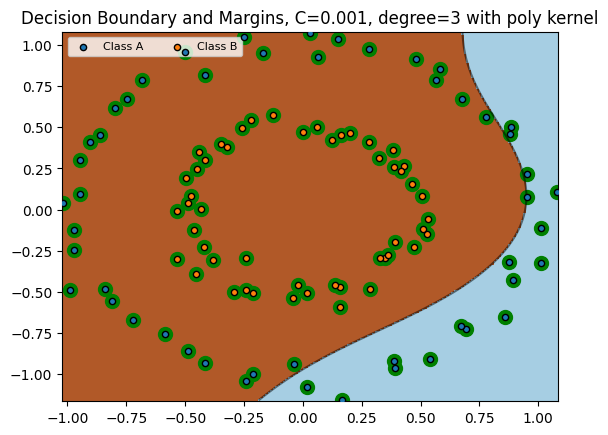

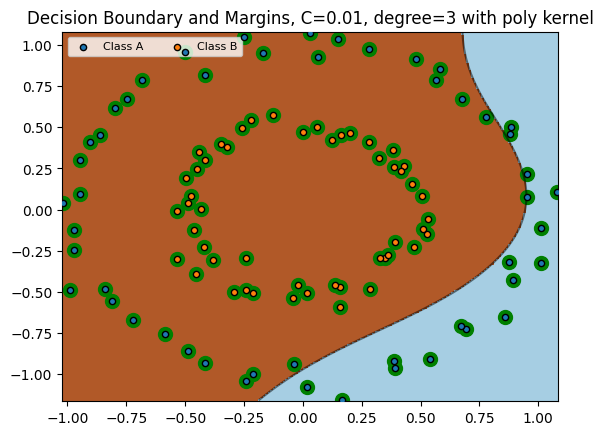

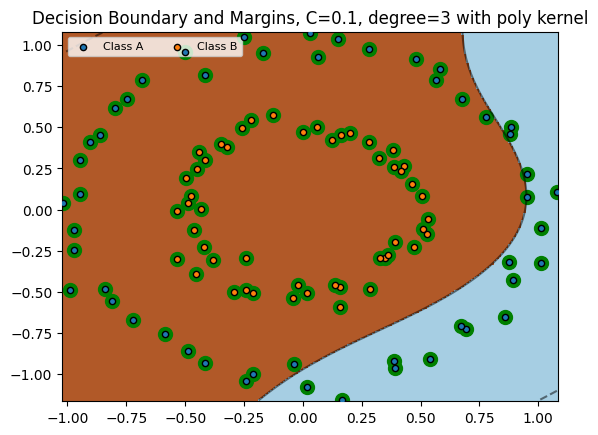

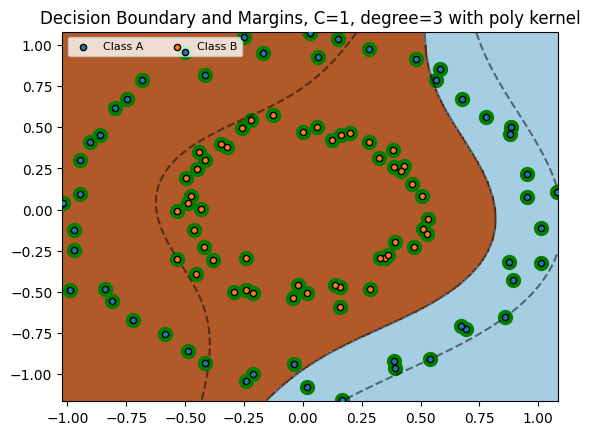

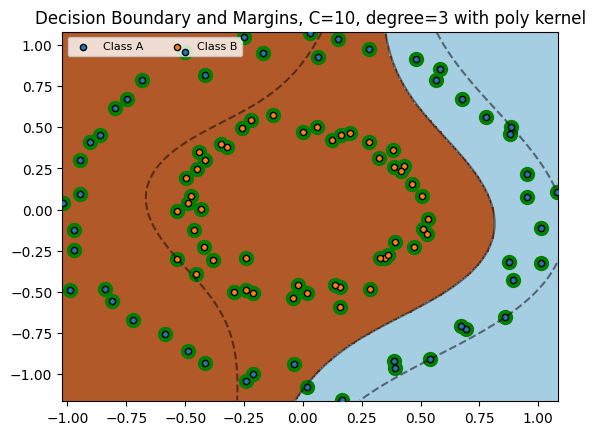

In [21]:
# Use SVM with poly kernel
### WRITE YOUR CODE HERE and PLAY with C, degree and coef0 parameters
# play with C value
C_value = [0.001, 0.01, 0.1, 1, 10]

for C in C_value:
    clf_poly = SVC(C=C, kernel='poly')
        
    clf_poly.fit(X, Y)
    plot(X, Y, clf_poly)

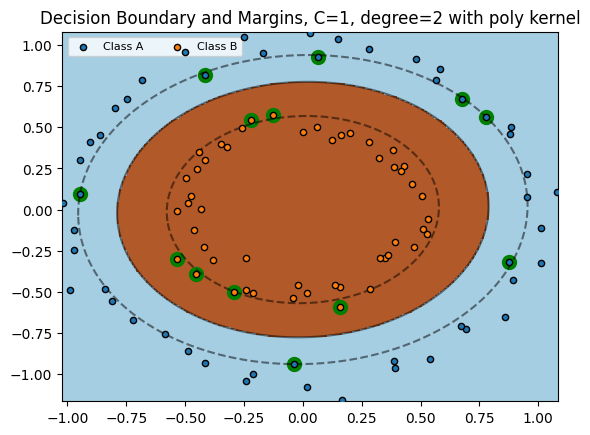

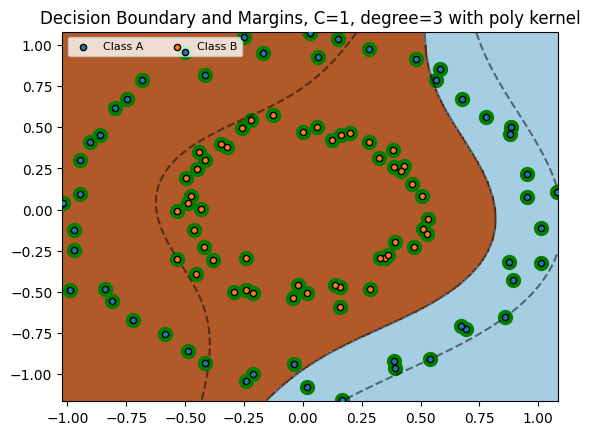

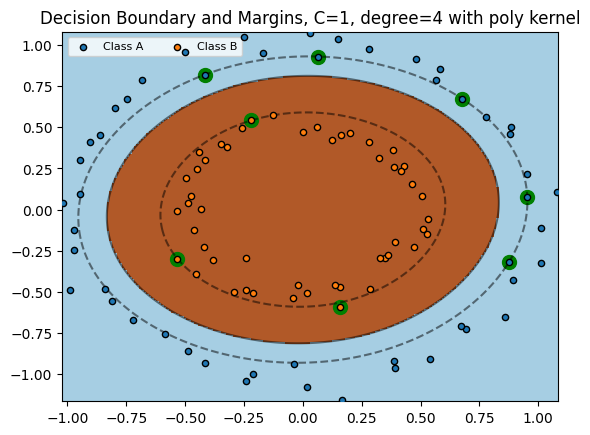

In [27]:
# Use SVM with poly kernel
### WRITE YOUR CODE HERE and PLAY with C, degree and coef0 parameters
# for C =1
# play with degree 
degree_value = [2, 3, 4]

for degree in degree_value:
    clf_poly = SVC(C=1, kernel='poly', degree=degree)
        
    clf_poly.fit(X, Y)
    plot(X, Y, clf_poly)

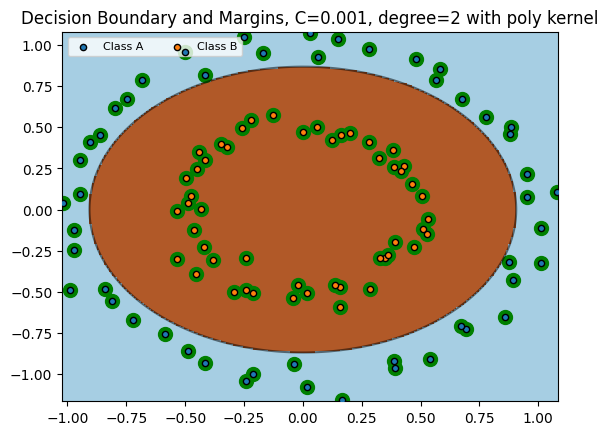

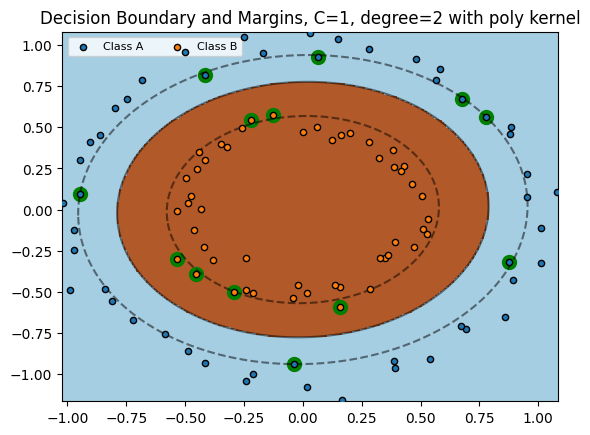

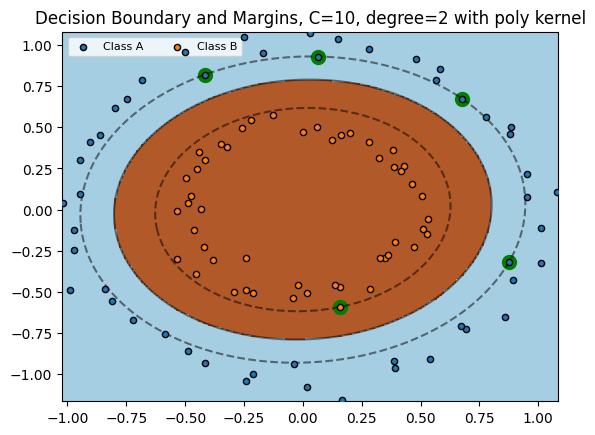

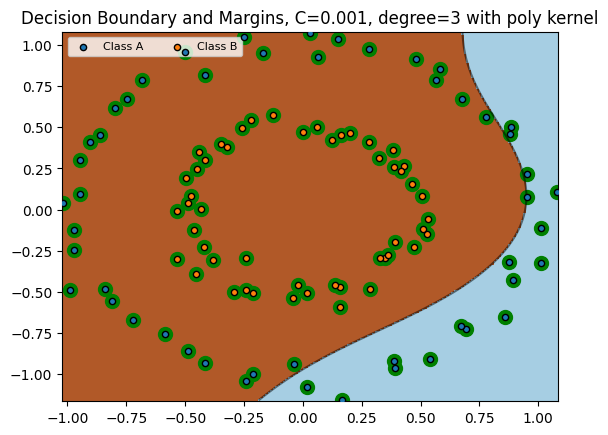

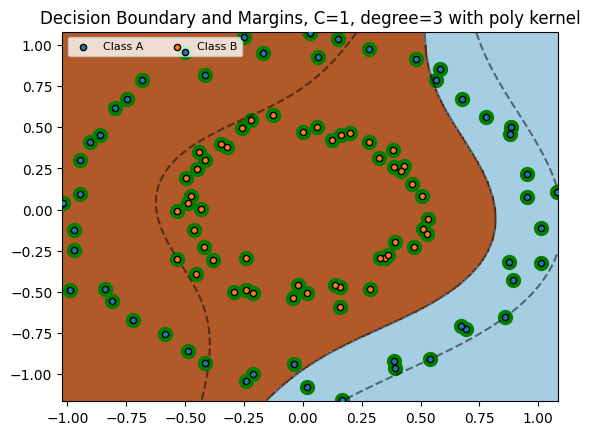

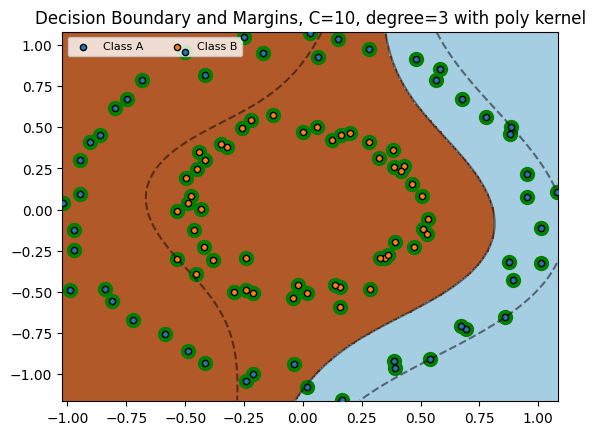

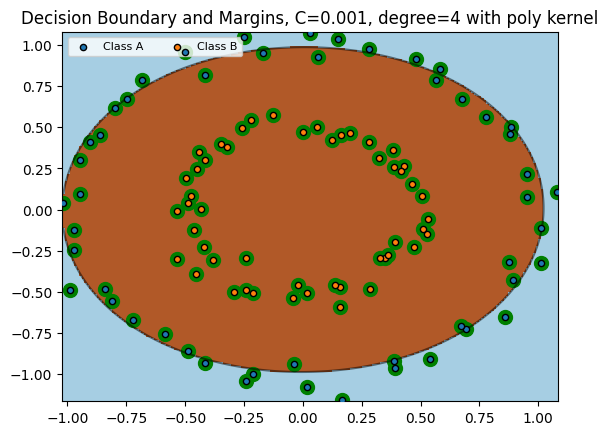

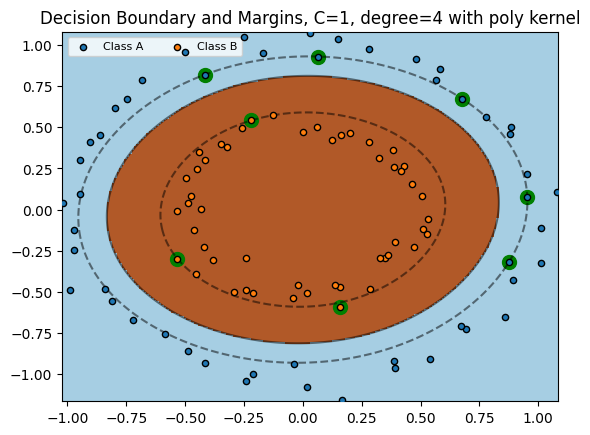

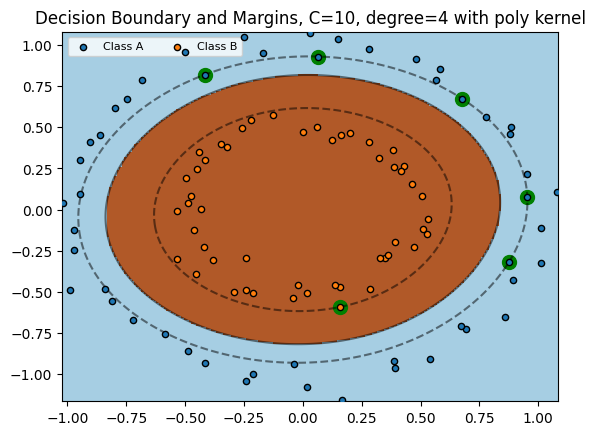

In [26]:
# Use SVM with poly kernel
### WRITE YOUR CODE HERE and PLAY with C, degree and coef0 parameters
# play with C value & degree 
C_value = [0.001, 1, 10]
degree_value = [2, 3, 4]

for degree in degree_value:
    for C in C_value:
        clf_poly = SVC(C=C, kernel='poly', degree=degree)
            
        clf_poly.fit(X, Y)
        plot(X, Y, clf_poly)

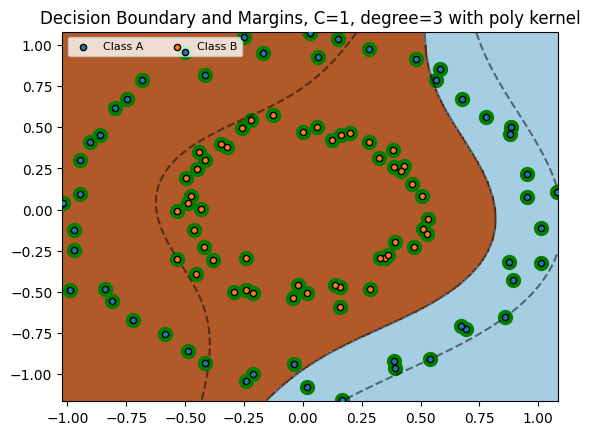

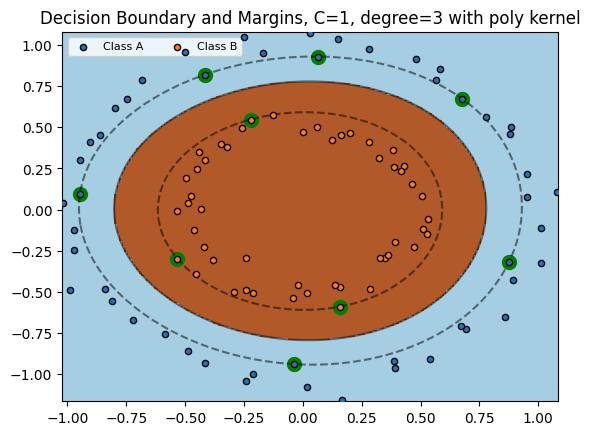

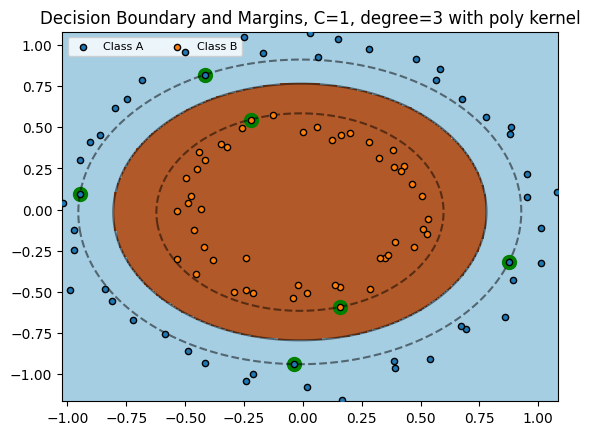

In [34]:
# Use SVM with poly kernel
### WRITE YOUR CODE HERE and PLAY with C, degree and coef0 parameters
# for C=1
# play with coef0 
coef0_value = [0, 1, 100]
for coef0 in coef0_value:
    clf_poly = SVC(C=1, kernel='poly', coef0=coef0)
        
    clf_poly.fit(X, Y)
    plot(X, Y, clf_poly)

**Q.** 
1. What are the differences between polynomial feature expansion and polynomial kernel function? 

2. Is the SVM trained with linear kernel on polynomially expanded data same as the SVM trained with polynomial kernel function on original data?

**A.** 

- 1. 
    - Polynomial Feature Expansion: Involves explicitly creating new features by raising the existing features to various powers. It results in an increase in the dimensionality of the feature space.

    - Polynomial Kernel Function: Operates directly on the original feature space without explicitly creating the expanded features. The kernel function computes the similarity between data points in a higher-dimensional space, allowing SVM to effectively handle non-linear relationships.

    if gamma = 1 in polynomial kernel function, then both algorithms are similar, but kernel function is more optimum because it just uses inner product of features exepct specifying each new sample features.(this assumption is ture if we don't consider other scikit_learn parameters)



- 2.

     No, there are not exactly same. for example for degree=2, even if gamma is equal for both models, the points on the boundary were not determined as support in scikit_learn kernel function. So the SVM trained with a linear kernel on polynomially expanded data explicitly creates new features, leading to a higher-dimensional space. In contrast, the SVM trained with a polynomial kernel function on the original data operates in a higher-dimensional space implicitly, without the need to create and store the expanded features. 


## 3.4 RBF SVM

Finally, let's try the Radial Basis Function (RBF) kernel:
* `rbf`: $\exp(-\gamma ||X - X'||^2)$. $\gamma$ is specified by keyword `gamma`, and must be greater than 0.

$\gamma$ is a form of scaling factor for the distance between points. If it is increased, then the exponential decays faster with distance, and vice-versa. 

Try different values of $\gamma$ below, e.g., in the range $[0.01, 100]$, and see how the decision function is affected.

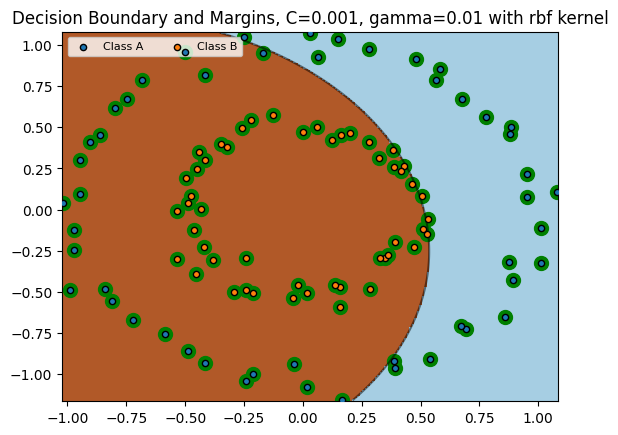

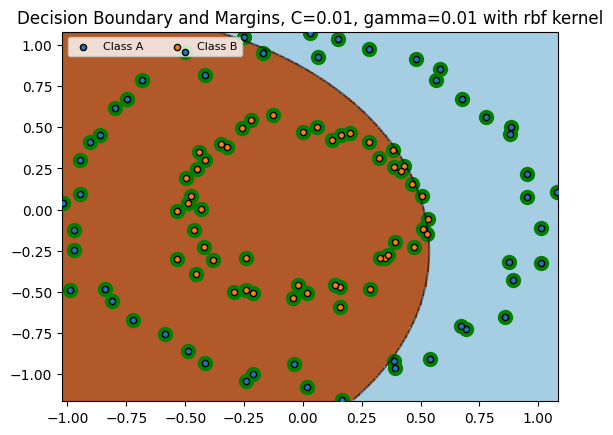

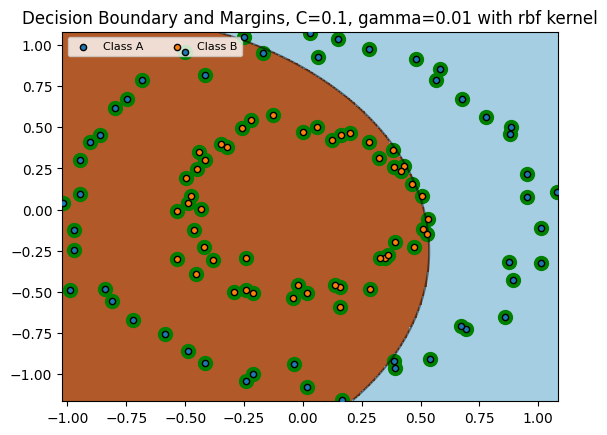

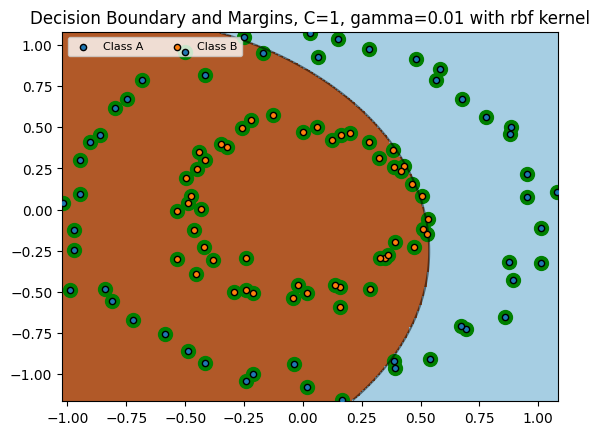

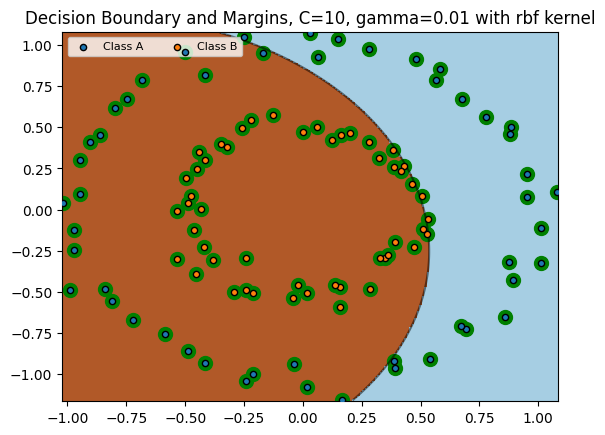

In [23]:
# Use SVM with rbf kernel
### WRITE YOUR CODE HERE and PLAY with C and gamma parameters
# play with C value
C_value = [0.001, 0.01, 0.1, 1, 10]

for C in C_value:
    clf_rbf = SVC(C=C, kernel='rbf', gamma=0.01)
        
    clf_rbf.fit(X, Y)
    plot(X, Y, clf_rbf)

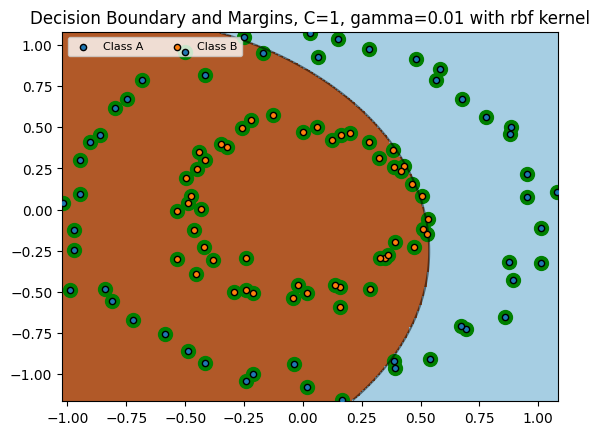

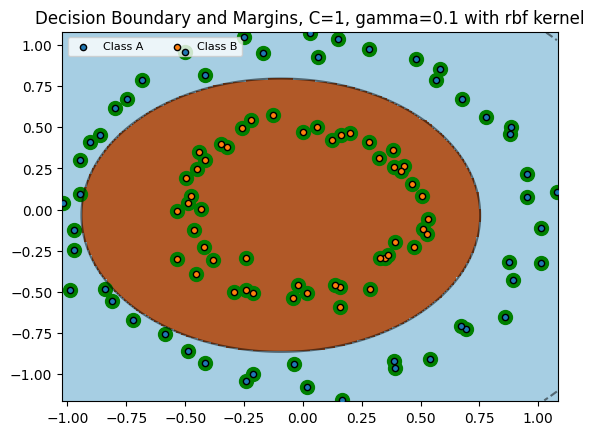

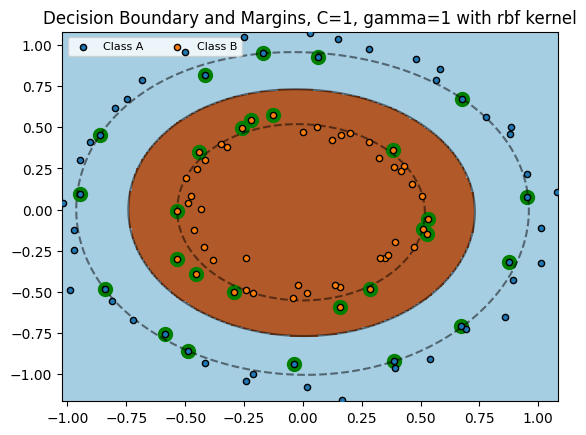

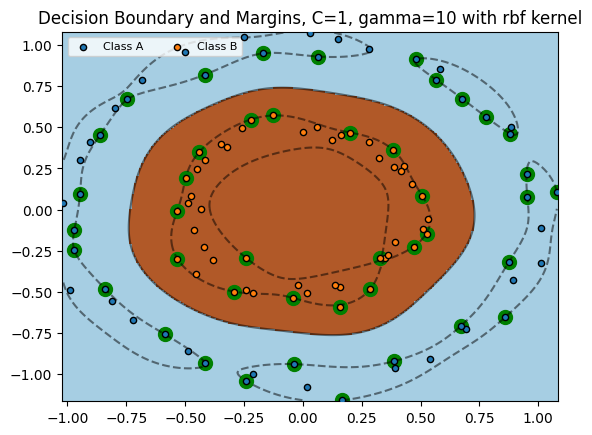

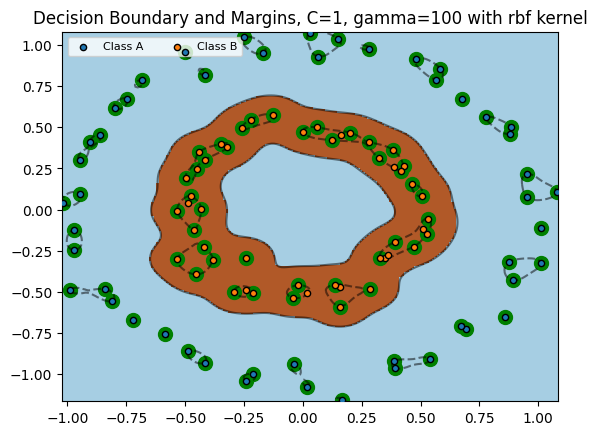

In [24]:
# Use SVM with rbf kernel
### WRITE YOUR CODE HERE and PLAY with C and gamma parameters
# play with gamma
gamma_value = [0.01, 0.1, 1, 10, 100]
for gamma in gamma_value:
    clf_rbf = SVC(C=1, kernel='rbf', gamma=gamma)
        
    clf_rbf.fit(X, Y)
    plot(X, Y, clf_rbf)

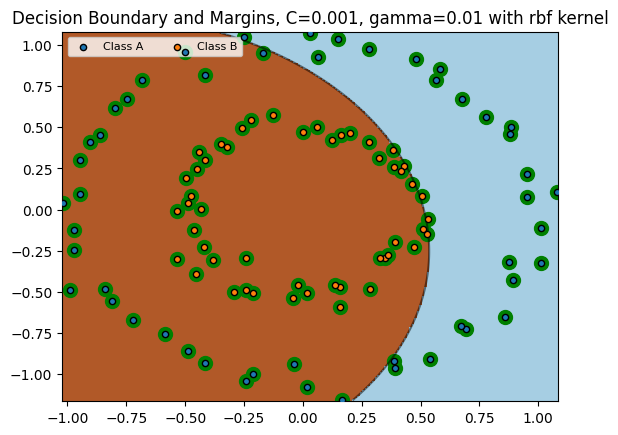

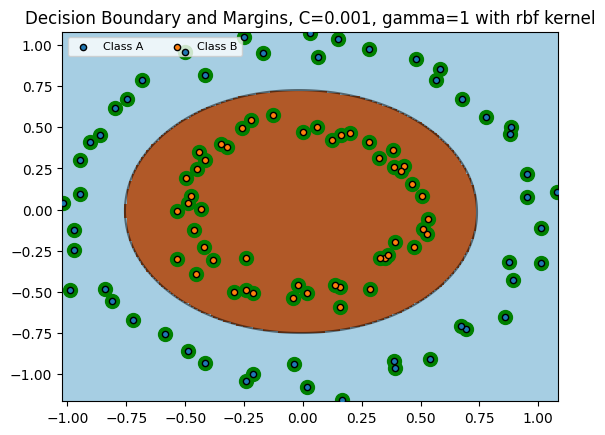

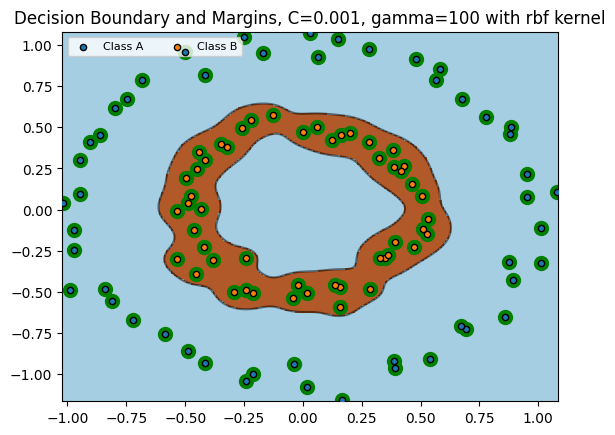

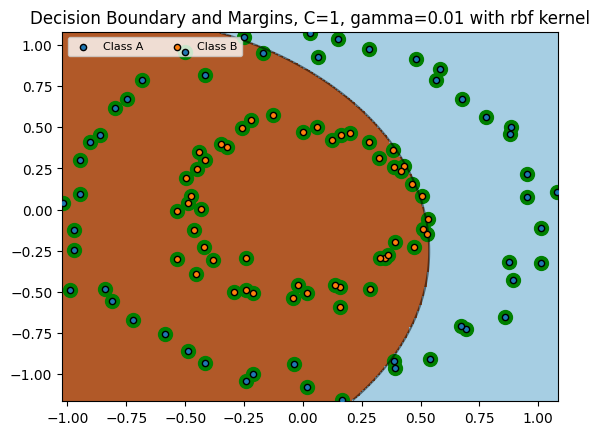

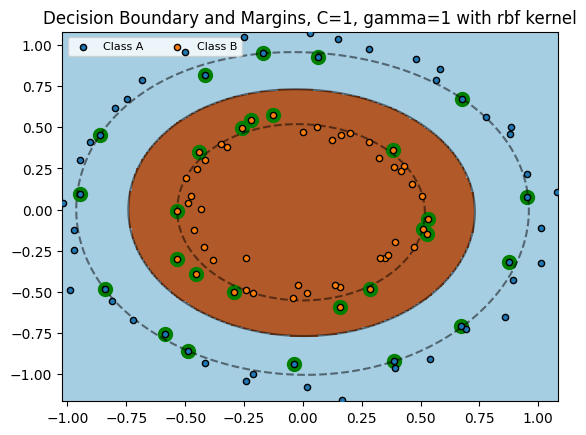

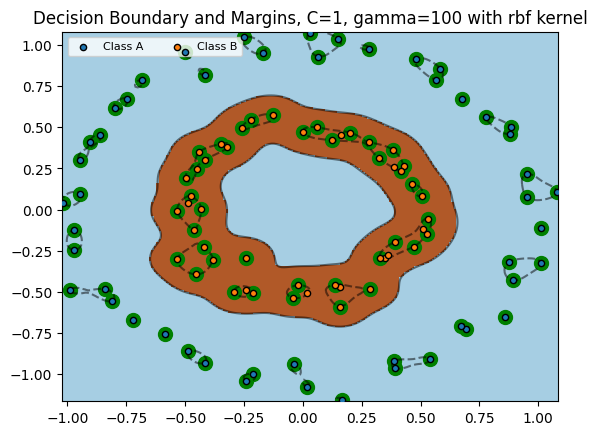

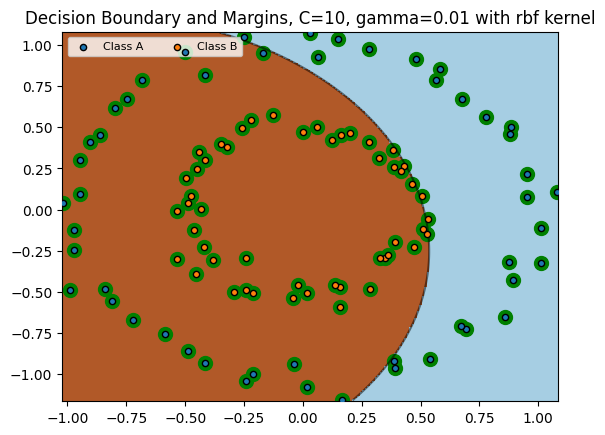

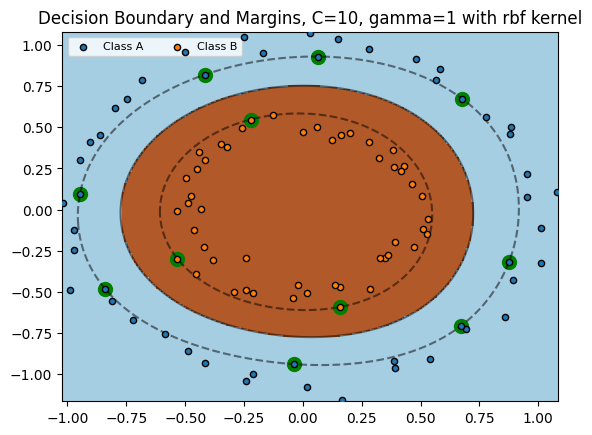

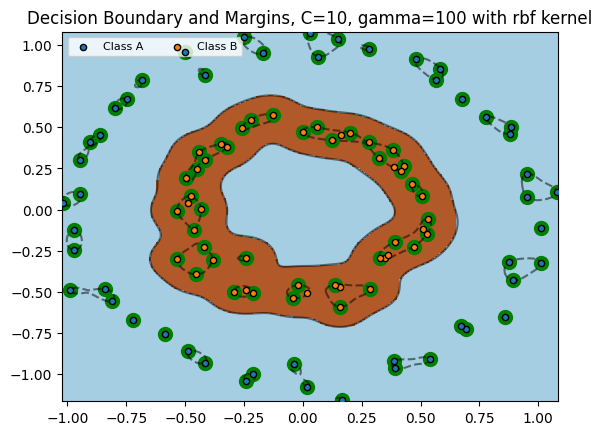

In [35]:
# Use SVM with rbf kernel
### WRITE YOUR CODE HERE and PLAY with C and gamma parameters
# play with both C & gamma
C_value = [0.001, 1, 10]
gamma_value = [0.01, 1, 100]

for C in C_value:
    for gamma in gamma_value:
        clf_rbf = SVC(C=C, kernel='rbf', gamma=gamma)
            
        clf_rbf.fit(X, Y)
        plot(X, Y, clf_rbf)

- **Interpretation**: 
    
    when gamma is too small, it's like we have very small changes in kernel function, so new features are not so different from basic one. however, when gamma increases, then the nonlinearity of the kernel increases, so it trains the algorithm more locally.

    So Higher $\gamma$ values result in more localized and complex decision boundaries, making the model sensitive to individual data points. Lower $\gamma$ values, on the other hand, lead to smoother decision boundaries, indicating a more generalized model that considers a broader region of the feature space.

### Choosing a kernel

We have seen how to use SVM for classification as a linear classifier, and then how to extend it to non-linearly separable data through the use of kernel functions.

But in practice, **how does one choose which kernel to use and its hyperparameters?**

You guessed it $\rightarrow$ by using a validation set! 

While in this exercise we have only tested SVM on the training data to visualize the effect of the different hyperparameters and kernels, on real problems we would also use validation data to evaluate the performance of the classifier.